# Conversão de Todos os Arquivos

In [5]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi']= 150

veja = pd.read_csv('veja.csv')
estadao = pd.read_csv('estadao.csv')
folha = pd.read_csv('folha.csv')
uol = pd.read_csv('uol.csv')

In [6]:
def getColumnsWithThemes(table):
    return list(filter(lambda column: 'Tema' in column, table.columns))

def getAllThemes(table):
    columnsWithTheme = getColumnsWithThemes(table)
    allThemes = Counter()
    
    for column in columnsWithTheme:
        for theme in table[column]:
            allThemes[theme] += 1
            
    allThemes = dict(allThemes)
    
    return allThemes

vejaThemes = getAllThemes(veja)
estadaoThemes = getAllThemes(estadao)
folhaThemes = getAllThemes(folha)
uolThemes = getAllThemes(uol)

baseThemes = [\
 'saude',\
 'entretenimento',\
 'politica',\
 'esporte',\
 'ciencia',\
 'brasil',\
 'educacao',\
 'tecnologia',\
 'blog',\
 'economia',\
 'outros']

def matchBaseTheme(s):
    for theme in baseThemes:
        if (theme in s):
            return (theme, s)
    return None

In [7]:
def cleanVejaThemes(themeString):
    themeString = str(themeString)
    if (matchBaseTheme(themeString) is not None):
        return matchBaseTheme(themeString)
    
    if ('esporte' in themeString or\
        'placar' in themeString):
        return ('esporte', themeString)
    if ('blog' in themeString):
        return 'blog'
    if ('galeria-fotos' in themeString or\
        'nan' in themeString or\
        'especiais' in themeString or\
        'gastronomia' in themeString or\
        'mundo' in themeString or\
        'ideias' in themeString or\
        '?p=2643144' in themeString or\
        'revista-veja' in themeString or\
        '?p=1833069' in themeString or\
        'tveja' in themeString):
        return ('outros', themeString)
    return (themeString, themeString)

list(\
     set(\
         map(\
             cleanVejaThemes,\
             list(vejaThemes.keys())\
            )\
        )\
    )

[('outros', 'gastronomia'),
 ('outros', '?p=2643144'),
 ('economia', 'economia'),
 ('brasil', 'brasil'),
 ('blog', 'blog'),
 ('outros', 'nan'),
 ('outros', 'especiais'),
 ('outros', 'tveja'),
 ('outros', 'ideias'),
 ('entretenimento', 'entretenimento'),
 ('blog', '?post_type=blog_post&p=2389127'),
 ('outros', 'mundo'),
 ('outros', '?p=1833069'),
 ('outros', 'revista-veja'),
 ('esporte', 'esporte'),
 ('outros', 'galeria-fotos'),
 ('esporte', 'placar'),
 ('saude', 'saude'),
 ('educacao', 'educacao'),
 ('politica', 'politica'),
 ('ciencia', 'ciencia'),
 ('blog', 'blogs'),
 ('tecnologia', 'tecnologia')]

# UOL

[85, 205, 14, 217, 10, 80, 50, 5, 23, 10, 5]
['esporte', 'outros', 'brasil', 'entretenimento', 'tecnologia', 'blog', 'politica', 'ciencia', 'economia', 'saude', 'educacao']


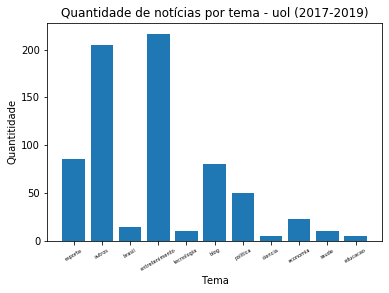

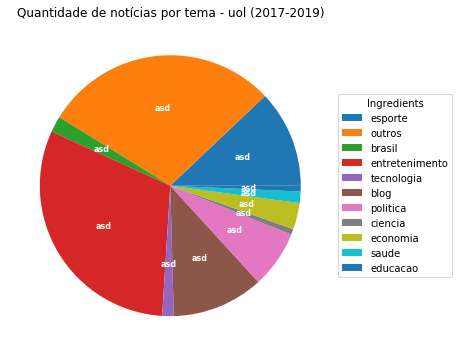

In [31]:
# Returns a tuple with:
# (mappedTheme, originalTheme)

def cleanUolThemes(themeString):
    themeString = str(themeString)
    if (matchBaseTheme(themeString) is not None):
        return matchBaseTheme(themeString)
    
    if (\
        'sport' in themeString or\
        'espn' in themeString or\
        'andrerocha' in themeString or\
        'copadomundo' in themeString or\
        'placar' in themeString or\
        'marcelrizzo' in themeString or\
        'corneta' in themeString\
       ):
        return ('esporte', themeString)
    
    if ('blog' in themeString or\
        'liabock' in themeString or\
        'paulosampaio' in themeString
       ):
        return ('blog', themeString)
    
    if (\
        'jamilchade' in themeString or\
        'poder' in themeString or\
        'carlosmelo' in themeString or\
        'congressoemfoco' in themeString or\
        'josiasdesouza' in themeString or\
        'eleicoes' in themeString\
       ):
        return ('politica', themeString)
    
    if ('noticiasdatv' in themeString or\
        'glamurama' in themeString or\
        'estilo' in themeString or\
        'maxima' in themeString or\
        'chicobarney' in themeString or\
        'revistatrip' in themeString or\
        'chicobarney' in themeString or\
        'mensageirosideral' in themeString or\
        'humor' in themeString or\
        'tvfama' in themeString or\
        'comidasebebeidas' in themeString or\
        'paginacinco' in themeString or\
        'superpop' in themeString or\
        'memes' in themeString or\
        'turismo' in themeString or\
        'virgula' in themeString or\
        'carnaval' in themeString or\
        'tvefamosos' in themeString or\
        'f5' in themeString or\
        'ilustrada' in themeString or\
        'comidasebebidas' in themeString or\
        'cinema' in themeString or\
        'musica' in themeString or\
        'mauriciostycer' in themeString or\
        'caras' in themeString or\
        'cenapop' in themeString or\
        'amauryjr' in themeString or\
        'cenapop' in themeString or\
        'natelinha' in themeString or\
        'recreio' in themeString\
       ):
        return ('entretenimento', themeString)
    
    if ('gizmodo' in themeString or\
        'ciencia' in themeString):
        return ('tecnologia', themeString)
    
    if ('mundo' in themeString or\
        'jornalismo' in themeString or\
        'carros' in themeString or\
        'paranormal' in themeString or\
        'universa' in themeString or\
        'paranaportal' in themeString or\
        'aovivo' in themeString or\
        'uol' in themeString or\
        'piaui' in themeString or\
        'zip' in themeString or\
        'aventurasnahistoria' in themeString or\
        'viagem' in themeString or\
        'cotidiano' in themeString\
       ):
        return ('outros', themeString)
    
    if ('colunas' in themeString or\
        'opiniao' in themeString):
        return ('blog', themeString)
    
    if ('mercado' in themeString or\
        'todosabordo' in themeString):
        return ('economia', themeString)
    
    if ('vivabem' in themeString\
       ):
        return ('saude', themeString)
    
    return ('outros', themeString)
    possibleThemes = themeString.split("#")
    
    if (possibleThemes[0].startswith('www')):
        return (possibleThemes[1], themeString)
    
    return (possibleThemes[0], themeString)

def createUolConversionTable():
    uolConversionTable = {}

    data = map(\
        lambda x: cleanUolThemes(x),\
        list(uolThemes.keys())\
    )

    for theme, originalTheme in data:
        uolConversionTable[originalTheme] = theme
        
    return uolConversionTable

uolConversionTable = createUolConversionTable()

uolThemesConverted = []

for theme in uolThemes:
    theme = str(theme)
    uolThemesConverted.append(uolConversionTable[theme])

uolThemesConverted = Counter(uolThemesConverted)

index = np.arange(len(uolThemesConverted.keys()))
# i = plt.bar(allThemes.keys(), allThemes.values())
plt.bar(index, uolThemesConverted.values())
plt.xlabel('Tema', fontsize=10)
plt.ylabel('Quantitidade', fontsize=10)
plt.xticks(index, uolThemesConverted.keys(), fontsize=5, rotation=30)
plt.title('Quantidade de notícias por tema - uol (2017-2019)')
# plt.savefig('uol.png')


# uol pie


fig, ax = plt.subplots(figsize=(12, 6), subplot_kw=dict(aspect="equal"))


data = list(uolThemesConverted.values())
ingredients = list(uolThemesConverted.keys())
print(data)
print(ingredients)


def percentage(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=percentage,
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Quantidade de notícias por tema - uol (2017-2019)")

plt.show()

# UOL - Tempo

In [ ]:
print(1)

# Estadao 

In [4]:
# NaN significa que não existe a notícia em dado dia

def cleanupEstadaoThemes(themeString):
    themeString = str(themeString)
    if (matchBaseTheme(themeString) is not None):
        return matchBaseTheme(themeString)
    if ('emais' in themeString):
        return ('entretenimento', themeString)
    return ('outros', themeString)


estadaoThemesCounter = Counter()
for theme, qty in dict(estadaoThemes).items():
    if (str(theme) != 'nan'):
        estadaoThemesCounter[cleanupEstadaoThemes(theme)[0]] += qty
        #print(cleanupEstadaoThemes(theme), qty)
        

def table():
    index = np.arange(len(estadaoThemesCounter.keys()))
    # i = plt.bar(allThemes.keys(), allThemes.values())
    plt.bar(index, estadaoThemesCounter.values())
    plt.xlabel('Tema', fontsize=10)
    plt.ylabel('Quantitidade', fontsize=10)
    plt.xticks(index, estadaoThemesCounter.keys(), fontsize=5, rotation=30)
    plt.title('Quantidade de notícias por tema - estadao (2017-2019)')
    plt.savefig('estadao.png')
    

NameError: name 'Counter' is not defined

# Folha

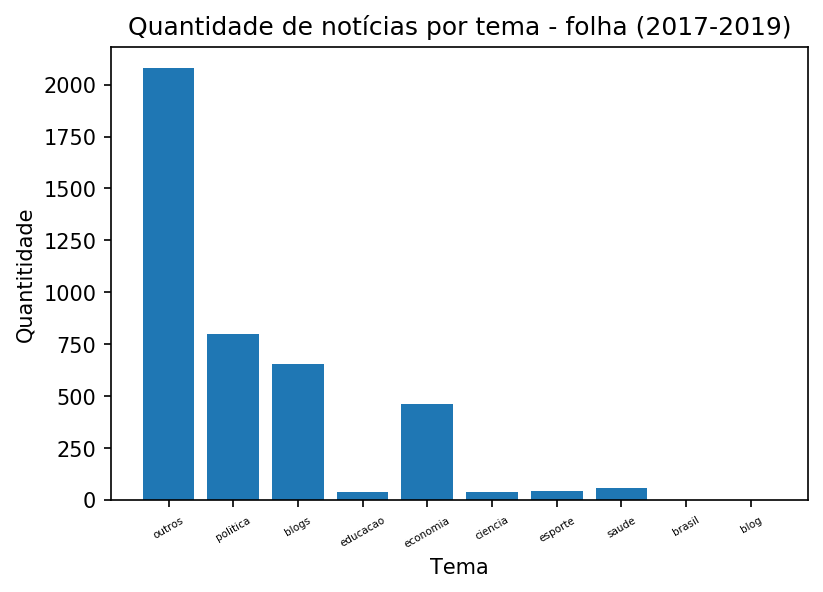

In [156]:
# NaN significa que não existe a notícia em dado dia

def cleanupFolhaThemes(themeString):
    themeString = str(themeString)
    if (matchBaseTheme(themeString) is not None):
        return matchBaseTheme(themeString)
    
    if ('poder' in themeString):
        return ('politica', themeString)
    
    if ('mercado' in themeString):
        return ('economia', themeString)
    
    if ('colunas' in themeString or\
        'colunista' in themeString or\
        'opiniao' in themeString
       ):
        return ('blogs', themeString)
    
    return ('outros', themeString)

folhaThemesCounter = Counter()

for theme, qty in dict(folhaThemes).items():
    if (theme != 'nan'):
        folhaThemesCounter[cleanupFolhaThemes(theme)[0]] += qty
        
def folhaTable():
    index = np.arange(len(folhaThemesCounter.keys()))
    # i = plt.bar(allThemes.keys(), allThemes.values())
    plt.bar(index, folhaThemesCounter.values())
    plt.xlabel('Tema', fontsize=10)
    plt.ylabel('Quantitidade', fontsize=10)
    plt.xticks(index, folhaThemesCounter.keys(), fontsize=5, rotation=30)
    plt.title('Quantidade de notícias por tema - folha (2017-2019)')
    plt.savefig('folha.png')

folhaTable()

# Scratchpad

In [ ]:
allThemes = list(vejaThemes.keys()) + list(estadaoThemes.keys()) + list(folhaThemes.keys()) + list(uolThemes.keys())
allThemes

In [ ]:
wantedKeys = ['esporte', 'brasil', 'entretenimento', 'mundo', 'economia', 'politica', 'saude', 'ciencia', 'tecnologia', 'blog', 'placar', 'educacao', 'tveja', 'revista-veja', 'blogs', 'especiais', 'ideias', 'gastronomia']
unwantedKeys = set(allThemes.keys()) - set(wantedKeys)
themesFiltered = { 'outros': 0 }

for key in wantedKeys:
    themesFiltered[key] = allThemes[key]

for key in unwantedKeys:
    themesFiltered['outros'] += allThemes[key]

themesFiltered

In [ ]:

index = np.arange(len(themesFiltered.keys()))
# i = plt.bar(allThemes.keys(), allThemes.values())
plt.bar(index, themesFiltered.values())
plt.xlabel('Tema', fontsize=10)
plt.ylabel('Quantitidade', fontsize=10)
plt.xticks(index, themesFiltered.keys(), fontsize=5, rotation=30)
plt.title('Quantidade de notícias por tema - Veja (2017-2019)')
plt.savefig('veja.png')

In [ ]:
allThemes.keys()

In [ ]:
def getQuantityOfThemes(themes, themesConversionTable):
    
    for key, value in themes:
        key